Vehicle_Category
HEAVY GOODS VEHICLE        int32
HEAVY MOTOR VEHICLE        int32
HEAVY PASSENGER VEHICLE    int32
dtype: object


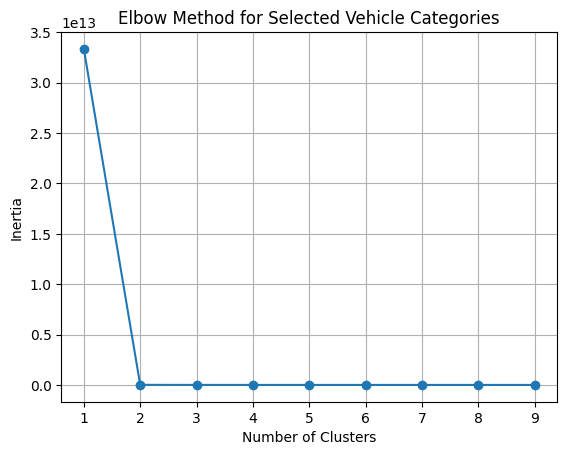


Silhouette Scores:
k = 2: Silhouette Score = 0.9562
k = 3: Silhouette Score = 0.8676
k = 4: Silhouette Score = 0.8377
k = 5: Silhouette Score = 0.7625
k = 6: Silhouette Score = 0.7687


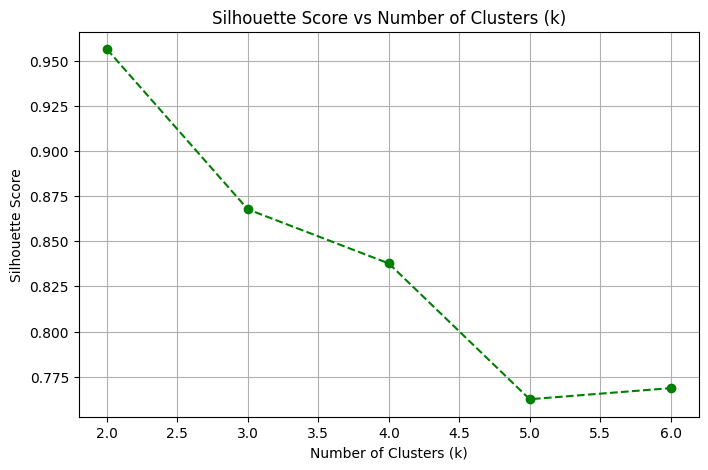

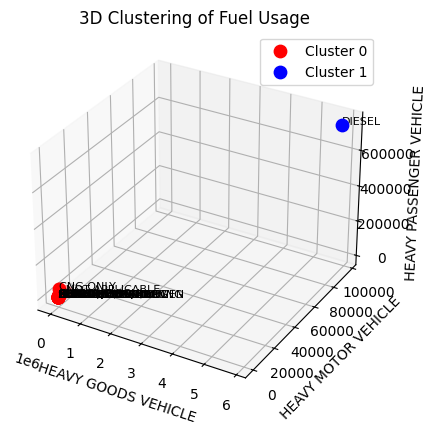


Cluster Assignments:
CNG ONLY               0
DIESEL                 1
DIESEL/HYBRID          0
DI-METHYL ETHER        0
DUAL DIESEL/BIO CNG    0
DUAL DIESEL/CNG        0
DUAL DIESEL/LNG        0
ELECTRIC(BOV)          0
ETHANOL                0
FUEL CELL HYDROGEN     0
LNG                    0
LPG ONLY               0
METHANOL               0
NOT APPLICABLE         0
PETROL                 0
PETROL/CNG             0
PETROL/ETHANOL         0
PETROL/HYBRID          0
PETROL/LPG             0
PETROL/METHANOL        0
PLUG-IN HYBRID EV      0
PURE EV                0
SOLAR                  0
STRONG HYBRID EV       0
Name: Cluster, dtype: int32


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
df = pd.read_csv("vehicle_fuel2.csv")

# Clean numeric columns: remove commas, convert to integers
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace(",", "").replace("nan", "0")
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Set vehicle category as index
df.set_index("Vehicle_Category", inplace=True)

# ------------------------------
# // Select rows 0 to 2
selected_rows = df.iloc[0:3]  # Adjust index range for other blocks
# ------------------------------

# Drop "Total" column (optional)
selected_rows = selected_rows.drop(columns=["Total"], errors="ignore")

# Transpose the DataFrame (so columns become features)
fuel_data = selected_rows.T

# Sanity check: ensure all data is numeric
print(fuel_data.dtypes)

# Elbow Method to determine optimal k
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(fuel_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method for Selected Vehicle Categories")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Silhouette Scores for 2–6 clusters
print("\nSilhouette Scores:")
silhouette_scores=[]
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(fuel_data)
    score = silhouette_score(fuel_data, labels)
    print(f"k = {k}: Silhouette Score = {score:.4f}")
    
    silhouette_scores.append(score)
# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 7), silhouette_scores, marker='o', linestyle='--', color='green')
plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()
# Final Clustering with optimal k (choose based on elbow/silhouette)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
fuel_data['Cluster'] = kmeans.fit_predict(fuel_data)

# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue', 'green', 'orange', 'purple']
for c in range(optimal_k):
    subset = fuel_data[fuel_data['Cluster'] == c]
    ax.scatter(subset.iloc[:, 0], subset.iloc[:, 1], subset.iloc[:, 2],
               label=f"Cluster {c}", color=colors[c % len(colors)], s=80)
    for label in subset.index:
        ax.text(subset.loc[label, subset.columns[0]],
                subset.loc[label, subset.columns[1]],
                subset.loc[label, subset.columns[2]], label, fontsize=8)

ax.set_xlabel(fuel_data.columns[0])
ax.set_ylabel(fuel_data.columns[1])
ax.set_zlabel(fuel_data.columns[2])
plt.title("Clustering among Heavy vehicles based on fuelz")
plt.legend()
plt.show()

# Final cluster assignment
print("\nCluster Assignments:")
print(fuel_data['Cluster'])


Vehicle_Category
LIGHT GOODS VEHICLE        int32
LIGHT MOTOR VEHICLE        int32
LIGHT PASSENGER VEHICLE    int32
dtype: object


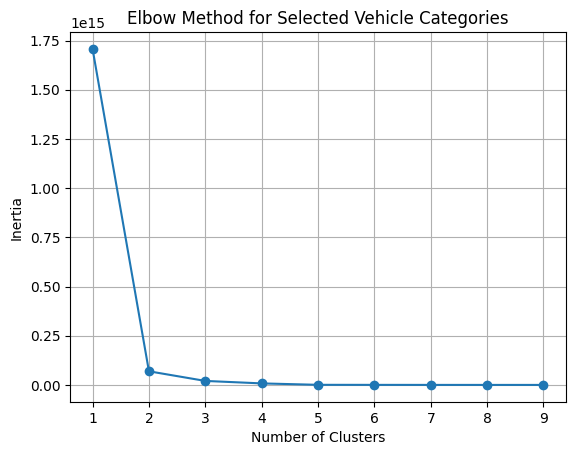


Silhouette Scores:
k = 2: Silhouette Score = 0.9497
k = 3: Silhouette Score = 0.8927
k = 4: Silhouette Score = 0.7144
k = 5: Silhouette Score = 0.7700
k = 6: Silhouette Score = 0.7618


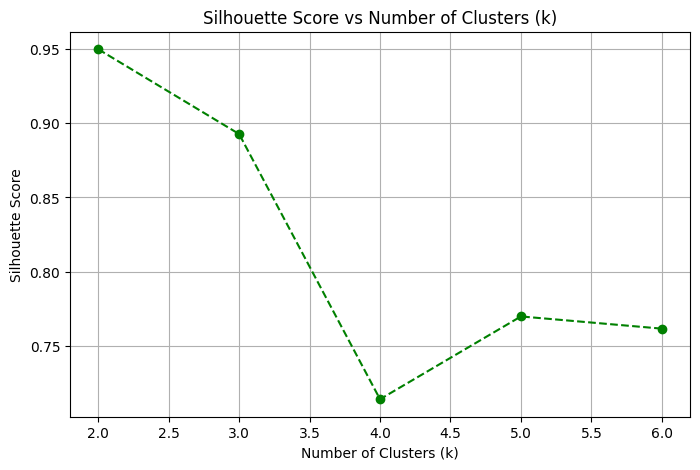

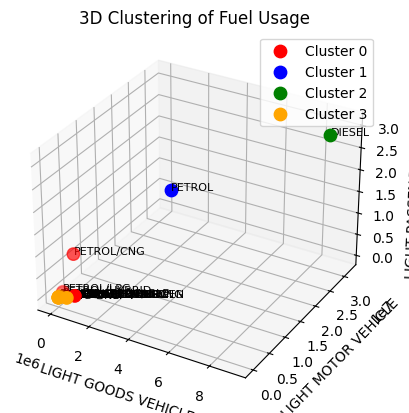


Cluster Assignments:
CNG ONLY               3
DIESEL                 2
DIESEL/HYBRID          3
DI-METHYL ETHER        3
DUAL DIESEL/BIO CNG    3
DUAL DIESEL/CNG        3
DUAL DIESEL/LNG        3
ELECTRIC(BOV)          3
ETHANOL                3
FUEL CELL HYDROGEN     3
LNG                    3
LPG ONLY               3
METHANOL               3
NOT APPLICABLE         0
PETROL                 1
PETROL/CNG             0
PETROL/ETHANOL         3
PETROL/HYBRID          0
PETROL/LPG             0
PETROL/METHANOL        3
PLUG-IN HYBRID EV      3
PURE EV                3
SOLAR                  3
STRONG HYBRID EV       3
Name: Cluster, dtype: int32


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
df = pd.read_csv("vehicle_fuel2.csv")

# Clean numeric columns: remove commas, convert to integers
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace(",", "").replace("nan", "0")
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Set vehicle category as index
df.set_index("Vehicle_Category", inplace=True)

# ------------------------------
# // Select rows  3,4,5
selected_rows = df.iloc[3:6]  # for rows 3,4,5
# ------------------------------

# Drop "Total" column (optional)
selected_rows = selected_rows.drop(columns=["Total"], errors="ignore")

# Transpose the DataFrame (so columns become features)
fuel_data = selected_rows.T

# Sanity check: ensure all data is numeric
print(fuel_data.dtypes)

# Elbow Method to determine optimal k
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(fuel_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method for Selected Vehicle Categories")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Silhouette Scores for 2–6 clusters
print("\nSilhouette Scores:")
silhouette_scores=[]
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(fuel_data)
    score = silhouette_score(fuel_data, labels)
    print(f"k = {k}: Silhouette Score = {score:.4f}")
    
    silhouette_scores.append(score)
# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 7), silhouette_scores, marker='o', linestyle='--', color='green')
plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Final Clustering with optimal k (choose based on elbow/silhouette)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
fuel_data['Cluster'] = kmeans.fit_predict(fuel_data)

# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue', 'green', 'orange', 'purple']
for c in range(optimal_k):
    subset = fuel_data[fuel_data['Cluster'] == c]
    ax.scatter(subset.iloc[:, 0], subset.iloc[:, 1], subset.iloc[:, 2],
               label=f"Cluster {c}", color=colors[c % len(colors)], s=80)
    for label in subset.index:
        ax.text(subset.loc[label, subset.columns[0]],
                subset.loc[label, subset.columns[1]],
                subset.loc[label, subset.columns[2]], label, fontsize=8)

ax.set_xlabel(fuel_data.columns[0])
ax.set_ylabel(fuel_data.columns[1])
ax.set_zlabel(fuel_data.columns[2])
plt.title("3D Clustering of Fuel Usage")
plt.legend()
plt.show()

# Final cluster assignment
print("\nCluster Assignments:")
print(fuel_data['Cluster'])


Vehicle_Category
MEDIUM GOODS VEHICLE        int32
MEDIUM MOTOR VEHICLE        int32
MEDIUM PASSENGER VEHICLE    int32
dtype: object


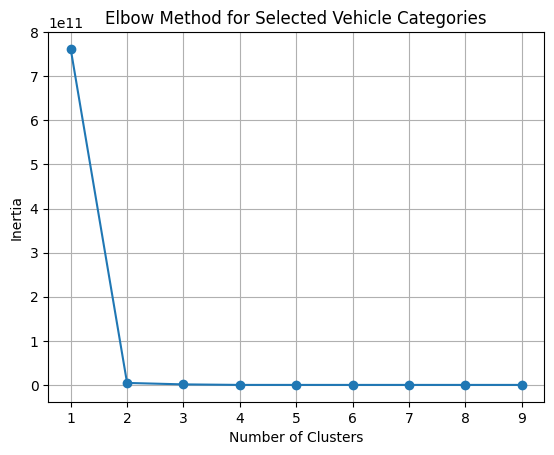


Silhouette Scores:
k = 2: Silhouette Score = 0.9488
k = 3: Silhouette Score = 0.8657
k = 4: Silhouette Score = 0.8652
k = 5: Silhouette Score = 0.8106
k = 6: Silhouette Score = 0.7634


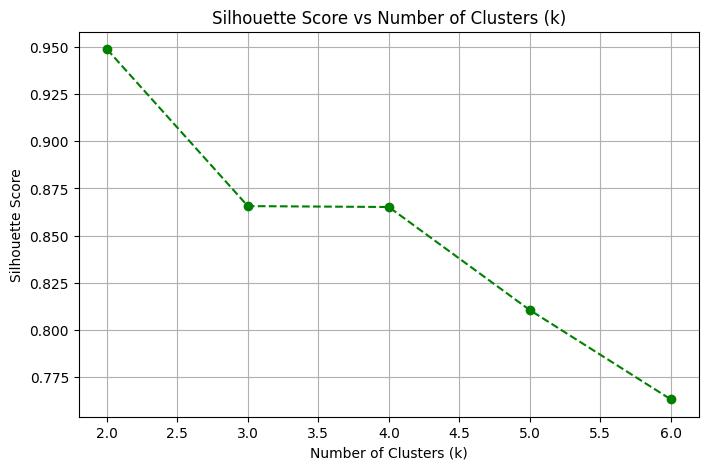

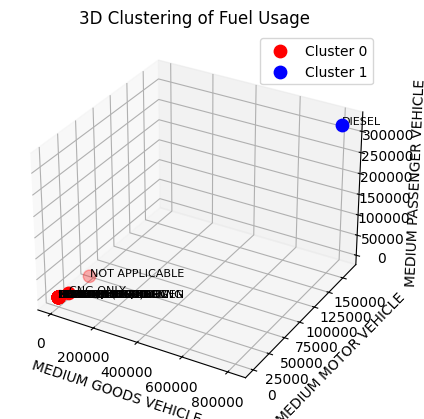


Cluster Assignments:
CNG ONLY               0
DIESEL                 1
DIESEL/HYBRID          0
DI-METHYL ETHER        0
DUAL DIESEL/BIO CNG    0
DUAL DIESEL/CNG        0
DUAL DIESEL/LNG        0
ELECTRIC(BOV)          0
ETHANOL                0
FUEL CELL HYDROGEN     0
LNG                    0
LPG ONLY               0
METHANOL               0
NOT APPLICABLE         0
PETROL                 0
PETROL/CNG             0
PETROL/ETHANOL         0
PETROL/HYBRID          0
PETROL/LPG             0
PETROL/METHANOL        0
PLUG-IN HYBRID EV      0
PURE EV                0
SOLAR                  0
STRONG HYBRID EV       0
Name: Cluster, dtype: int32


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
df = pd.read_csv("vehicle_fuel2.csv")

# Clean numeric columns: remove commas, convert to integers
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace(",", "").replace("nan", "0")
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Set vehicle category as index
df.set_index("Vehicle_Category", inplace=True)

# ------------------------------
# // Select rows 6,7,8
selected_rows = df.iloc[6:9]  # for rows 6,7,8
# ------------------------------

# Drop "Total" column (optional)
selected_rows = selected_rows.drop(columns=["Total"], errors="ignore")

# Transpose the DataFrame (so columns become features)
fuel_data = selected_rows.T

# Sanity check: ensure all data is numeric
print(fuel_data.dtypes)

# Elbow Method to determine optimal k
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(fuel_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method for Selected Vehicle Categories")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Silhouette Scores for 2–6 clusters
print("\nSilhouette Scores:")
silhouette_scores=[]
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(fuel_data)
    score = silhouette_score(fuel_data, labels)
    print(f"k = {k}: Silhouette Score = {score:.4f}")
    
    silhouette_scores.append(score)
# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 7), silhouette_scores, marker='o', linestyle='--', color='green')
plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Final Clustering with optimal k (choose based on elbow/silhouette)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
fuel_data['Cluster'] = kmeans.fit_predict(fuel_data)

# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue', 'green', 'orange', 'purple']
for c in range(optimal_k):
    subset = fuel_data[fuel_data['Cluster'] == c]
    ax.scatter(subset.iloc[:, 0], subset.iloc[:, 1], subset.iloc[:, 2],
               label=f"Cluster {c}", color=colors[c % len(colors)], s=80)
    for label in subset.index:
        ax.text(subset.loc[label, subset.columns[0]],
                subset.loc[label, subset.columns[1]],
                subset.loc[label, subset.columns[2]], label, fontsize=8)

ax.set_xlabel(fuel_data.columns[0])
ax.set_ylabel(fuel_data.columns[1])
ax.set_zlabel(fuel_data.columns[2])
plt.title("3D Clustering of Fuel Usage")
plt.legend()
plt.show()

# Final cluster assignment
print("\nCluster Assignments:")
print(fuel_data['Cluster'])


Vehicle_Category
THREE WHEELER (INVALID CARRIAGE)    int32
THREE WHEELER(NT)                   int32
THREE WHEELER(T)                    int32
dtype: object


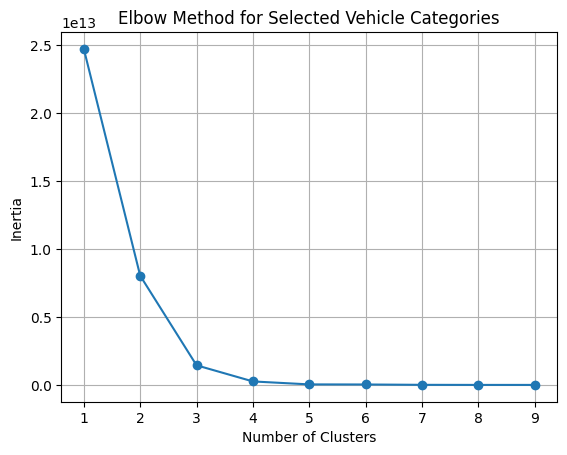


Silhouette Scores:
k = 2: Silhouette Score = 0.7880
k = 3: Silhouette Score = 0.8220
k = 4: Silhouette Score = 0.8368
k = 5: Silhouette Score = 0.8221
k = 6: Silhouette Score = 0.7787


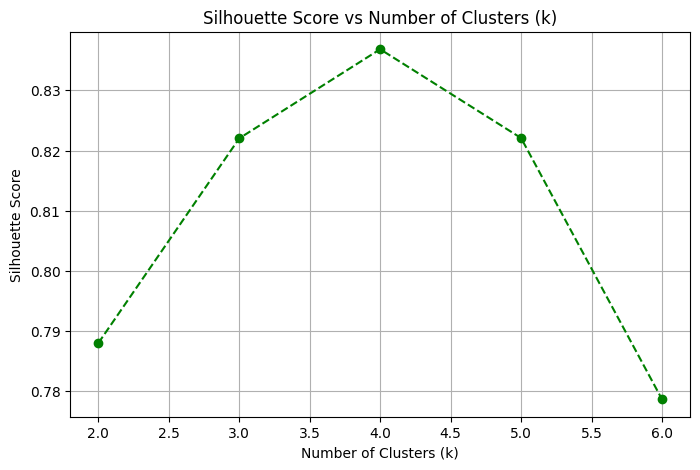

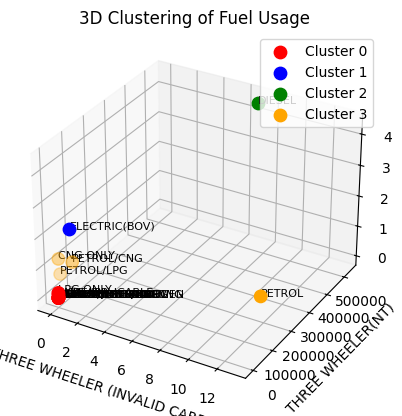


Cluster Assignments:
CNG ONLY               3
DIESEL                 2
DIESEL/HYBRID          0
DI-METHYL ETHER        0
DUAL DIESEL/BIO CNG    0
DUAL DIESEL/CNG        0
DUAL DIESEL/LNG        0
ELECTRIC(BOV)          1
ETHANOL                0
FUEL CELL HYDROGEN     0
LNG                    0
LPG ONLY               0
METHANOL               0
NOT APPLICABLE         0
PETROL                 3
PETROL/CNG             3
PETROL/ETHANOL         0
PETROL/HYBRID          0
PETROL/LPG             3
PETROL/METHANOL        0
PLUG-IN HYBRID EV      0
PURE EV                0
SOLAR                  0
STRONG HYBRID EV       0
Name: Cluster, dtype: int32


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
df = pd.read_csv("vehicle_fuel2.csv")

# Clean numeric columns: remove commas, convert to integers
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace(",", "").replace("nan", "0")
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Set vehicle category as index
df.set_index("Vehicle_Category", inplace=True)

# ------------------------------
# // Select rows  9,10,11
selected_rows = df.iloc[9:12]  # for rows 9,10,11
# ------------------------------

# Drop "Total" column (optional)
selected_rows = selected_rows.drop(columns=["Total"], errors="ignore")

# Transpose the DataFrame (so columns become features)
fuel_data = selected_rows.T

# Sanity check: ensure all data is numeric
print(fuel_data.dtypes)

# Elbow Method to determine optimal k
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(fuel_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method for Selected Vehicle Categories")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Silhouette Scores for 2–6 clusters
print("\nSilhouette Scores:")
silhouette_scores=[]
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(fuel_data)
    score = silhouette_score(fuel_data, labels)
    print(f"k = {k}: Silhouette Score = {score:.4f}")
    
    silhouette_scores.append(score)
# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 7), silhouette_scores, marker='o', linestyle='--', color='green')
plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Final Clustering with optimal k (choose based on elbow/silhouette)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
fuel_data['Cluster'] = kmeans.fit_predict(fuel_data)

# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue', 'green', 'orange', 'purple']
for c in range(optimal_k):
    subset = fuel_data[fuel_data['Cluster'] == c]
    ax.scatter(subset.iloc[:, 0], subset.iloc[:, 1], subset.iloc[:, 2],
               label=f"Cluster {c}", color=colors[c % len(colors)], s=80)
    for label in subset.index:
        ax.text(subset.loc[label, subset.columns[0]],
                subset.loc[label, subset.columns[1]],
                subset.loc[label, subset.columns[2]], label, fontsize=8)

ax.set_xlabel(fuel_data.columns[0])
ax.set_ylabel(fuel_data.columns[1])
ax.set_zlabel(fuel_data.columns[2])
plt.title("3D Clustering of Fuel Usage")
plt.legend()
plt.show()

# Final cluster assignment
print("\nCluster Assignments:")
print(fuel_data['Cluster'])


Vehicle_Category
HEAVY MOTOR VEHICLE     int32
LIGHT MOTOR VEHICLE     int32
MEDIUM MOTOR VEHICLE    int32
dtype: object


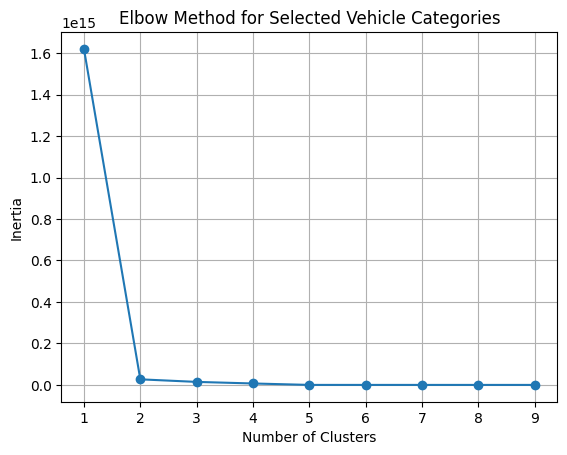


Silhouette Scores:
k = 2: Silhouette Score = 0.9668
k = 3: Silhouette Score = 0.8247
k = 4: Silhouette Score = 0.7531
k = 5: Silhouette Score = 0.8303
k = 6: Silhouette Score = 0.7047


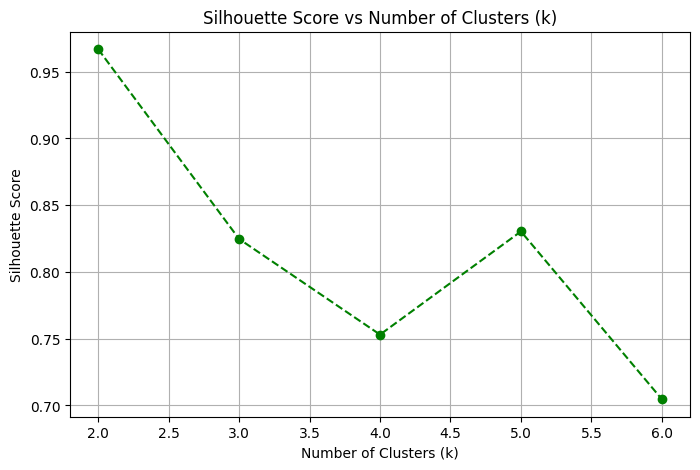

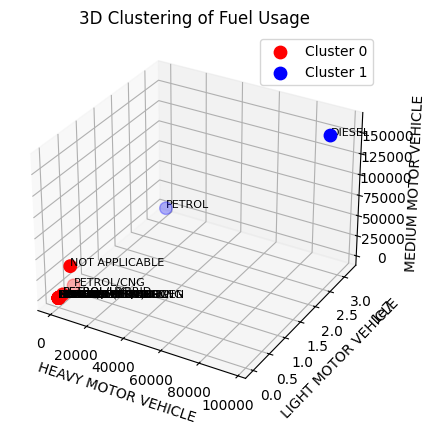


Cluster Assignments:
CNG ONLY               0
DIESEL                 1
DIESEL/HYBRID          0
DI-METHYL ETHER        0
DUAL DIESEL/BIO CNG    0
DUAL DIESEL/CNG        0
DUAL DIESEL/LNG        0
ELECTRIC(BOV)          0
ETHANOL                0
FUEL CELL HYDROGEN     0
LNG                    0
LPG ONLY               0
METHANOL               0
NOT APPLICABLE         0
PETROL                 1
PETROL/CNG             0
PETROL/ETHANOL         0
PETROL/HYBRID          0
PETROL/LPG             0
PETROL/METHANOL        0
PLUG-IN HYBRID EV      0
PURE EV                0
SOLAR                  0
STRONG HYBRID EV       0
Name: Cluster, dtype: int32


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
df = pd.read_csv("vehicle_fuel2.csv")

# Clean numeric columns: remove commas, convert to integers
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace(",", "").replace("nan", "0")
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Set vehicle category as index
df.set_index("Vehicle_Category", inplace=True)

# ------------------------------
# // Select rows  12,13,14
selected_rows = df.iloc[12:15]  # for rows 12,13,14
# ------------------------------

# Drop "Total" column (optional)
selected_rows = selected_rows.drop(columns=["Total"], errors="ignore")

# Transpose the DataFrame (so columns become features)
fuel_data = selected_rows.T

# Sanity check: ensure all data is numeric
print(fuel_data.dtypes)

# Elbow Method to determine optimal k
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(fuel_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method for Selected Vehicle Categories")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Silhouette Scores for 2–6 clusters
print("\nSilhouette Scores:")
silhouette_scores=[]
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(fuel_data)
    score = silhouette_score(fuel_data, labels)
    print(f"k = {k}: Silhouette Score = {score:.4f}")
    
    silhouette_scores.append(score)
# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 7), silhouette_scores, marker='o', linestyle='--', color='green')
plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Final Clustering with optimal k (choose based on elbow/silhouette)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
fuel_data['Cluster'] = kmeans.fit_predict(fuel_data)

# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue', 'green', 'orange', 'purple']
for c in range(optimal_k):
    subset = fuel_data[fuel_data['Cluster'] == c]
    ax.scatter(subset.iloc[:, 0], subset.iloc[:, 1], subset.iloc[:, 2],
               label=f"Cluster {c}", color=colors[c % len(colors)], s=80)
    for label in subset.index:
        ax.text(subset.loc[label, subset.columns[0]],
                subset.loc[label, subset.columns[1]],
                subset.loc[label, subset.columns[2]], label, fontsize=8)

ax.set_xlabel(fuel_data.columns[0])
ax.set_ylabel(fuel_data.columns[1])
ax.set_zlabel(fuel_data.columns[2])
plt.title("3D Clustering of Fuel Usage")
plt.legend()
plt.show()

# Final cluster assignment
print("\nCluster Assignments:")
print(fuel_data['Cluster'])


Vehicle_Category
HEAVY GOODS VEHICLE     int32
LIGHT GOODS VEHICLE     int32
MEDIUM GOODS VEHICLE    int32
dtype: object


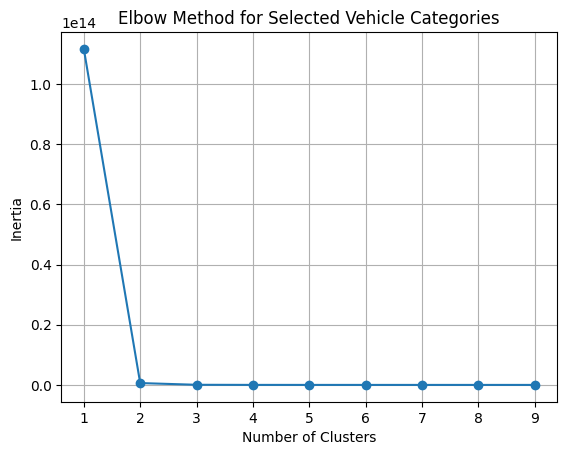


Silhouette Scores:
k = 2: Silhouette Score = 0.9475
k = 3: Silhouette Score = 0.8918
k = 4: Silhouette Score = 0.8606
k = 5: Silhouette Score = 0.8136
k = 6: Silhouette Score = 0.7351


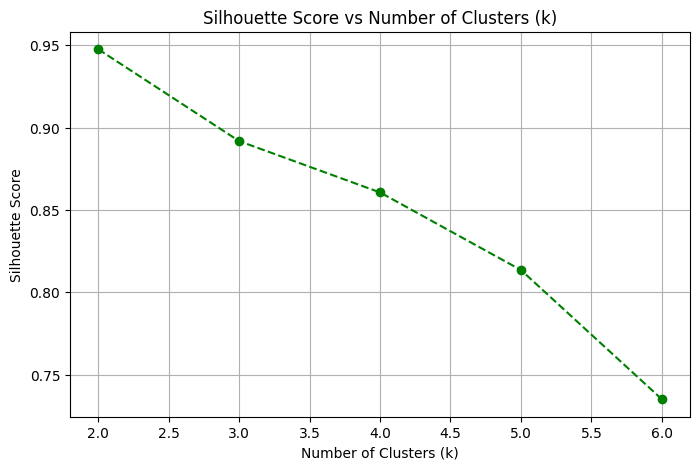

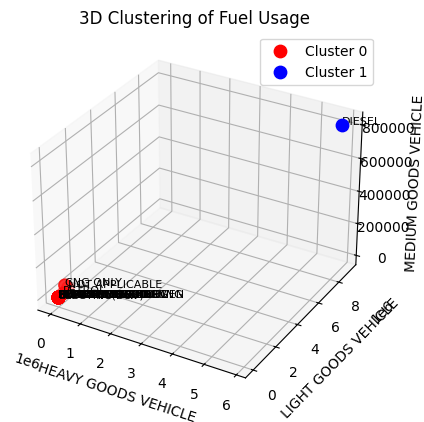


Cluster Assignments:
CNG ONLY               0
DIESEL                 1
DIESEL/HYBRID          0
DI-METHYL ETHER        0
DUAL DIESEL/BIO CNG    0
DUAL DIESEL/CNG        0
DUAL DIESEL/LNG        0
ELECTRIC(BOV)          0
ETHANOL                0
FUEL CELL HYDROGEN     0
LNG                    0
LPG ONLY               0
METHANOL               0
NOT APPLICABLE         0
PETROL                 0
PETROL/CNG             0
PETROL/ETHANOL         0
PETROL/HYBRID          0
PETROL/LPG             0
PETROL/METHANOL        0
PLUG-IN HYBRID EV      0
PURE EV                0
SOLAR                  0
STRONG HYBRID EV       0
Name: Cluster, dtype: int32


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
df = pd.read_csv("vehicle_fuel2.csv")

# Clean numeric columns: remove commas, convert to integers
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace(",", "").replace("nan", "0")
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Set vehicle category as index
df.set_index("Vehicle_Category", inplace=True)

# ------------------------------
# // Select rows  0, 3, 6
selected_rows = df.iloc[[0, 3, 6]]

# ------------------------------

# Drop "Total" column (optional)
selected_rows = selected_rows.drop(columns=["Total"], errors="ignore")

# Transpose the DataFrame (so columns become features)
fuel_data = selected_rows.T

# Sanity check: ensure all data is numeric
print(fuel_data.dtypes)

# Elbow Method to determine optimal k
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(fuel_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method for Selected Vehicle Categories")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Silhouette Scores for 2–6 clusters
print("\nSilhouette Scores:")
silhouette_scores=[]
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(fuel_data)
    score = silhouette_score(fuel_data, labels)
    print(f"k = {k}: Silhouette Score = {score:.4f}")
    
    silhouette_scores.append(score)
# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 7), silhouette_scores, marker='o', linestyle='--', color='green')
plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Final Clustering with optimal k (choose based on elbow/silhouette)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
fuel_data['Cluster'] = kmeans.fit_predict(fuel_data)

# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue', 'green', 'orange', 'purple']
for c in range(optimal_k):
    subset = fuel_data[fuel_data['Cluster'] == c]
    ax.scatter(subset.iloc[:, 0], subset.iloc[:, 1], subset.iloc[:, 2],
               label=f"Cluster {c}", color=colors[c % len(colors)], s=80)
    for label in subset.index:
        ax.text(subset.loc[label, subset.columns[0]],
                subset.loc[label, subset.columns[1]],
                subset.loc[label, subset.columns[2]], label, fontsize=8)

ax.set_xlabel(fuel_data.columns[0])
ax.set_ylabel(fuel_data.columns[1])
ax.set_zlabel(fuel_data.columns[2])
plt.title("3D Clustering of Fuel Usage")
plt.legend()
plt.show()

# Final cluster assignment
print("\nCluster Assignments:")
print(fuel_data['Cluster'])


Vehicle_Category
HEAVY MOTOR VEHICLE     int32
LIGHT MOTOR VEHICLE     int32
MEDIUM MOTOR VEHICLE    int32
dtype: object


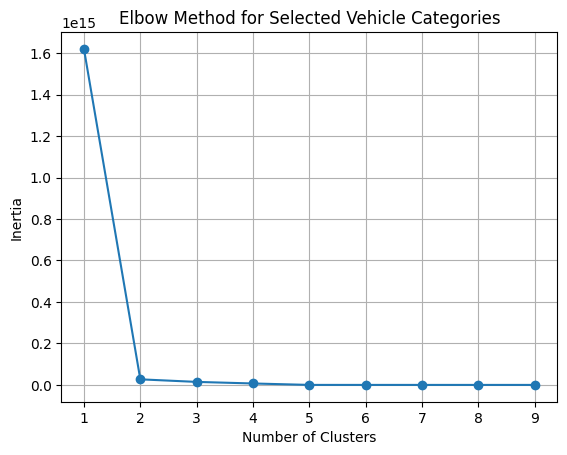


Silhouette Scores:
k = 2: Silhouette Score = 0.9668
k = 3: Silhouette Score = 0.8247
k = 4: Silhouette Score = 0.7531
k = 5: Silhouette Score = 0.8303
k = 6: Silhouette Score = 0.7047


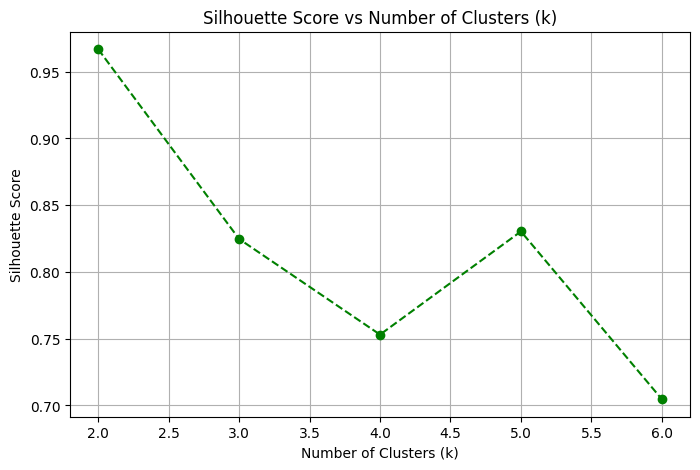

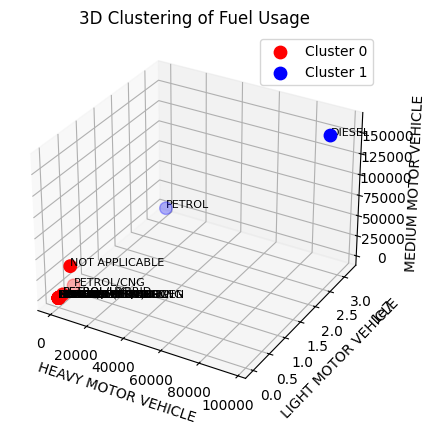


Cluster Assignments:
CNG ONLY               0
DIESEL                 1
DIESEL/HYBRID          0
DI-METHYL ETHER        0
DUAL DIESEL/BIO CNG    0
DUAL DIESEL/CNG        0
DUAL DIESEL/LNG        0
ELECTRIC(BOV)          0
ETHANOL                0
FUEL CELL HYDROGEN     0
LNG                    0
LPG ONLY               0
METHANOL               0
NOT APPLICABLE         0
PETROL                 1
PETROL/CNG             0
PETROL/ETHANOL         0
PETROL/HYBRID          0
PETROL/LPG             0
PETROL/METHANOL        0
PLUG-IN HYBRID EV      0
PURE EV                0
SOLAR                  0
STRONG HYBRID EV       0
Name: Cluster, dtype: int32


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
df = pd.read_csv("vehicle_fuel2.csv")

# Clean numeric columns: remove commas, convert to integers
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace(",", "").replace("nan", "0")
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Set vehicle category as index
df.set_index("Vehicle_Category", inplace=True)

# ------------------------------
# // Select rows  1, 4, 7
selected_rows = df.iloc[[1, 4, 7]]
# ------------------------------

# Drop "Total" column (optional)
selected_rows = selected_rows.drop(columns=["Total"], errors="ignore")

# Transpose the DataFrame (so columns become features)
fuel_data = selected_rows.T

# Sanity check: ensure all data is numeric
print(fuel_data.dtypes)

# Elbow Method to determine optimal k
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(fuel_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method for Selected Vehicle Categories")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Silhouette Scores for 2–6 clusters
print("\nSilhouette Scores:")
silhouette_scores=[]
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(fuel_data)
    score = silhouette_score(fuel_data, labels)
    print(f"k = {k}: Silhouette Score = {score:.4f}")
    
    silhouette_scores.append(score)
# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 7), silhouette_scores, marker='o', linestyle='--', color='green')
plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Final Clustering with optimal k (choose based on elbow/silhouette)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
fuel_data['Cluster'] = kmeans.fit_predict(fuel_data)

# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue', 'green', 'orange', 'purple']
for c in range(optimal_k):
    subset = fuel_data[fuel_data['Cluster'] == c]
    ax.scatter(subset.iloc[:, 0], subset.iloc[:, 1], subset.iloc[:, 2],
               label=f"Cluster {c}", color=colors[c % len(colors)], s=80)
    for label in subset.index:
        ax.text(subset.loc[label, subset.columns[0]],
                subset.loc[label, subset.columns[1]],
                subset.loc[label, subset.columns[2]], label, fontsize=8)

ax.set_xlabel(fuel_data.columns[0])
ax.set_ylabel(fuel_data.columns[1])
ax.set_zlabel(fuel_data.columns[2])
plt.title("3D Clustering of Fuel Usage")
plt.legend()
plt.show()

# Final cluster assignment
print("\nCluster Assignments:")
print(fuel_data['Cluster'])


                          CNG ONLY   DIESEL  DIESEL/HYBRID  DI-METHYL ETHER  \
Vehicle_Category                                                              
HEAVY PASSENGER VEHICLE      49672   755697             49                0   
LIGHT PASSENGER VEHICLE      52822  3070265           4657                0   
MEDIUM PASSENGER VEHICLE     18161   321928              9                0   

                          DUAL DIESEL/BIO CNG  DUAL DIESEL/CNG  \
Vehicle_Category                                                 
HEAVY PASSENGER VEHICLE                     0               13   
LIGHT PASSENGER VEHICLE                     0                4   
MEDIUM PASSENGER VEHICLE                    0                5   

                          DUAL DIESEL/LNG  ELECTRIC(BOV)  ETHANOL  \
Vehicle_Category                                                    
HEAVY PASSENGER VEHICLE                 0           9498       25   
LIGHT PASSENGER VEHICLE                 0          25348        2 

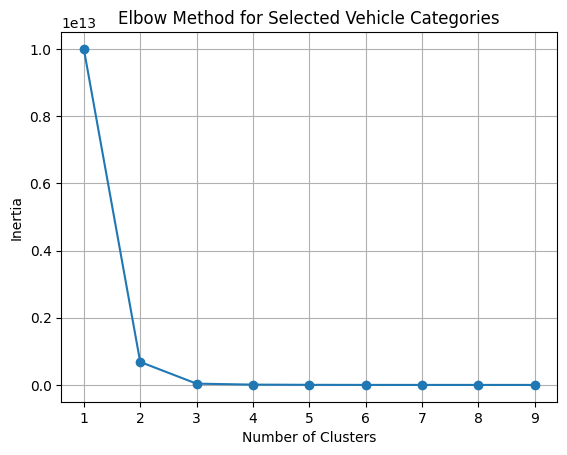


Silhouette Scores:
k = 2: Silhouette Score = 0.9198
k = 3: Silhouette Score = 0.8951
k = 4: Silhouette Score = 0.8391
k = 5: Silhouette Score = 0.6925
k = 6: Silhouette Score = 0.7191


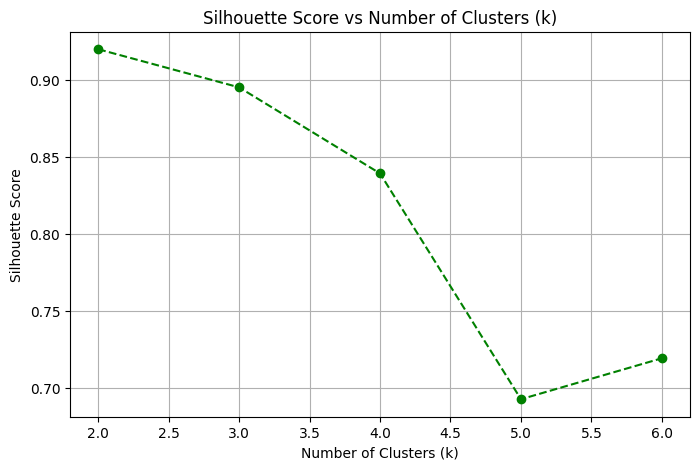

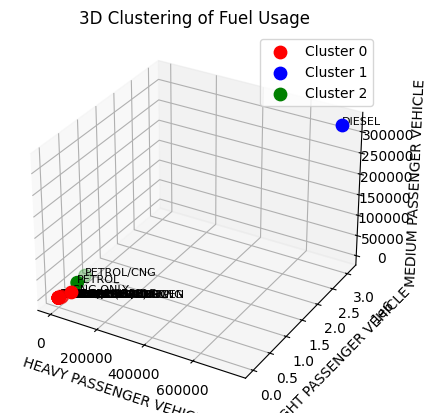


Cluster Assignments:
CNG ONLY               0
DIESEL                 1
DIESEL/HYBRID          0
DI-METHYL ETHER        0
DUAL DIESEL/BIO CNG    0
DUAL DIESEL/CNG        0
DUAL DIESEL/LNG        0
ELECTRIC(BOV)          0
ETHANOL                0
FUEL CELL HYDROGEN     0
LNG                    0
LPG ONLY               0
METHANOL               0
NOT APPLICABLE         0
PETROL                 2
PETROL/CNG             2
PETROL/ETHANOL         0
PETROL/HYBRID          0
PETROL/LPG             0
PETROL/METHANOL        0
PLUG-IN HYBRID EV      0
PURE EV                0
SOLAR                  0
STRONG HYBRID EV       0
Name: Cluster, dtype: int32


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
df = pd.read_csv("vehicle_fuel2.csv")

# Clean numeric columns: remove commas, convert to integers
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace(",", "").replace("nan", "0")
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Set vehicle category as index
df.set_index("Vehicle_Category", inplace=True)

# ------------------------------
# // Select rows  2, 5, 8
selected_rows = df.iloc[[2, 5, 8]]
print(selected_rows)# ------------------------------

# ------------------------------

# Drop "Total" column (optional)
selected_rows = selected_rows.drop(columns=["Total"], errors="ignore")

# Transpose the DataFrame (so columns become features)
fuel_data = selected_rows.T

# Sanity check: ensure all data is numeric
print(fuel_data.dtypes)

# Elbow Method to determine optimal k
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(fuel_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method for Selected Vehicle Categories")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Silhouette Scores for 2–6 clusters
print("\nSilhouette Scores:")
silhouette_scores=[]
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(fuel_data)
    score = silhouette_score(fuel_data, labels)
    print(f"k = {k}: Silhouette Score = {score:.4f}")
    
    silhouette_scores.append(score)
# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 7), silhouette_scores, marker='o', linestyle='--', color='green')
plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Final Clustering with optimal k (choose based on elbow/silhouette)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
fuel_data['Cluster'] = kmeans.fit_predict(fuel_data)

# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue', 'green', 'orange', 'purple']
for c in range(optimal_k):
    subset = fuel_data[fuel_data['Cluster'] == c]
    ax.scatter(subset.iloc[:, 0], subset.iloc[:, 1], subset.iloc[:, 2],
               label=f"Cluster {c}", color=colors[c % len(colors)], s=80)
    for label in subset.index:
        ax.text(subset.loc[label, subset.columns[0]],
                subset.loc[label, subset.columns[1]],
                subset.loc[label, subset.columns[2]], label, fontsize=8)

ax.set_xlabel(fuel_data.columns[0])
ax.set_ylabel(fuel_data.columns[1])
ax.set_zlabel(fuel_data.columns[2])
plt.title("3D Clustering of Fuel Usage")
plt.legend()
plt.show()

# Final cluster assignment
print("\nCluster Assignments:")
print(fuel_data['Cluster'])


Vehicle_Category
HEAVY GOODS VEHICLE        int32
HEAVY MOTOR VEHICLE        int32
HEAVY PASSENGER VEHICLE    int32
dtype: object


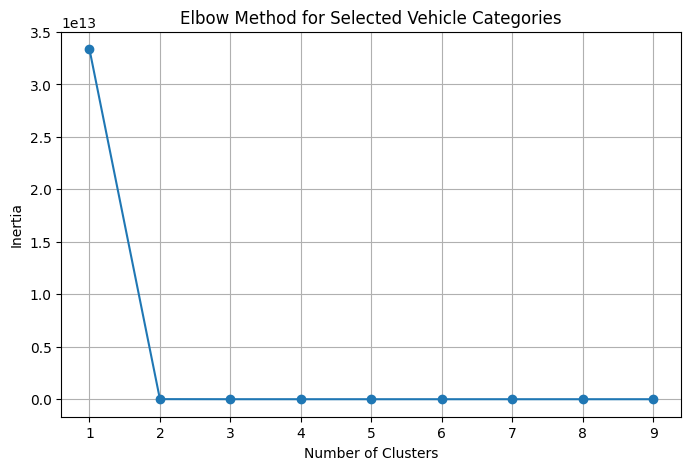


Silhouette Scores:
k = 2: Silhouette Score = 0.9562
k = 3: Silhouette Score = 0.8676
k = 4: Silhouette Score = 0.8377
k = 5: Silhouette Score = 0.7625
k = 6: Silhouette Score = 0.7687


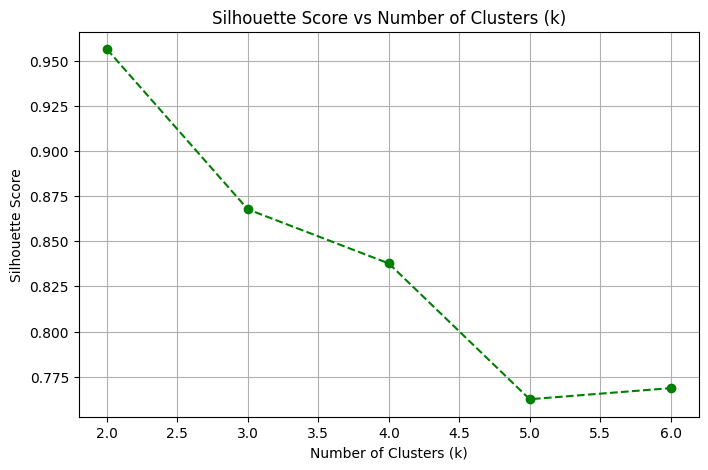

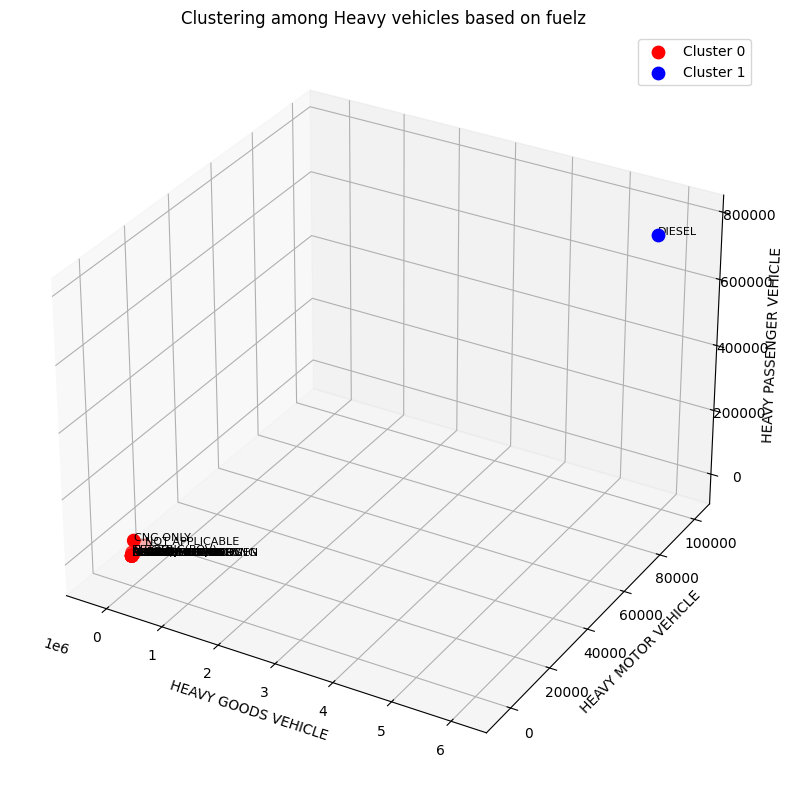


Cluster Assignments:
CNG ONLY               0
DIESEL                 1
DIESEL/HYBRID          0
DI-METHYL ETHER        0
DUAL DIESEL/BIO CNG    0
DUAL DIESEL/CNG        0
DUAL DIESEL/LNG        0
ELECTRIC(BOV)          0
ETHANOL                0
FUEL CELL HYDROGEN     0
LNG                    0
LPG ONLY               0
METHANOL               0
NOT APPLICABLE         0
PETROL                 0
PETROL/CNG             0
PETROL/ETHANOL         0
PETROL/HYBRID          0
PETROL/LPG             0
PETROL/METHANOL        0
PLUG-IN HYBRID EV      0
PURE EV                0
SOLAR                  0
STRONG HYBRID EV       0
Name: Cluster, dtype: int32


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
df = pd.read_csv("vehicle_fuel2.csv")

# Clean numeric columns: remove commas, convert to integers
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace(",", "").replace("nan", "0")
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Set vehicle category as index
df.set_index("Vehicle_Category", inplace=True)

# Select rows 0 to 2
selected_rows = df.iloc[0:3]  # Adjust index range for other blocks

# Drop "Total" column (optional)
selected_rows = selected_rows.drop(columns=["Total"], errors="ignore")

# Transpose the DataFrame (so columns become features)
fuel_data = selected_rows.T

# Sanity check: ensure all data is numeric
print(fuel_data.dtypes)

# Elbow Method to determine optimal k
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(fuel_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method for Selected Vehicle Categories")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Silhouette Scores for 2–6 clusters
print("\nSilhouette Scores:")
silhouette_scores = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(fuel_data)
    score = silhouette_score(fuel_data, labels)
    print(f"k = {k}: Silhouette Score = {score:.4f}")
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 7), silhouette_scores, marker='o', linestyle='--', color='green')
plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Final Clustering with optimal k (choose based on elbow/silhouette)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
fuel_data['Cluster'] = kmeans.fit_predict(fuel_data)

# 3D plot with fixed scaling
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Get min/max values for each axis with padding
x_vals = fuel_data.iloc[:, 0]
y_vals = fuel_data.iloc[:, 1]
z_vals = fuel_data.iloc[:, 2]

x_range = x_vals.max() - x_vals.min()
y_range = y_vals.max() - y_vals.min()
z_range = z_vals.max() - z_vals.min()

# Set axis limits with 10% padding
ax.set_xlim(x_vals.min() - 0.1*x_range, x_vals.max() + 0.1*x_range)
ax.set_ylim(y_vals.min() - 0.1*y_range, y_vals.max() + 0.1*y_range)
ax.set_zlim(z_vals.min() - 0.1*z_range, z_vals.max() + 0.1*z_range)

# Plot the clusters
for c in range(optimal_k):
    subset = fuel_data[fuel_data['Cluster'] == c]
    ax.scatter(subset.iloc[:, 0], subset.iloc[:, 1], subset.iloc[:, 2],
               label=f"Cluster {c}", color=colors[c % len(colors)], s=80)
    # Add labels
    for label in subset.index:
        ax.text(subset.loc[label, subset.columns[0]],
                subset.loc[label, subset.columns[1]],
                subset.loc[label, subset.columns[2]], 
                label, fontsize=8)

ax.set_xlabel(fuel_data.columns[0], fontsize=10)
ax.set_ylabel(fuel_data.columns[1], fontsize=10)
ax.set_zlabel(fuel_data.columns[2], fontsize=10)
plt.title("Clustering among Heavy vehicles based on fuelz", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Final cluster assignment
print("\nCluster Assignments:")
print(fuel_data['Cluster'])

Vehicle_Category
MEDIUM GOODS VEHICLE        int32
MEDIUM MOTOR VEHICLE        int32
MEDIUM PASSENGER VEHICLE    int32
dtype: object


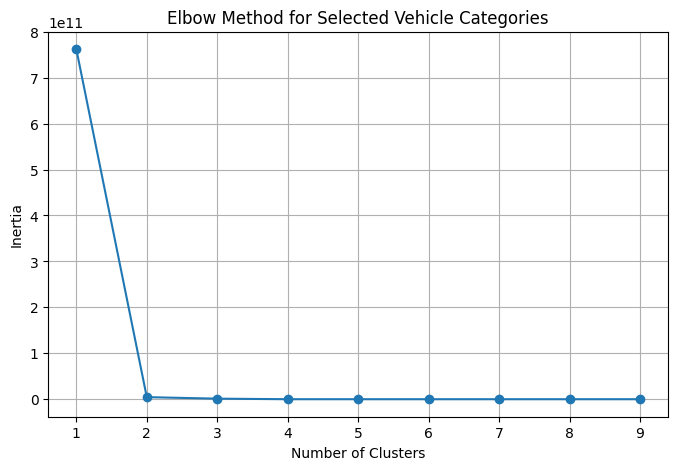


Silhouette Scores:
k = 2: Silhouette Score = 0.9488
k = 3: Silhouette Score = 0.8657
k = 4: Silhouette Score = 0.8652
k = 5: Silhouette Score = 0.8106
k = 6: Silhouette Score = 0.7634


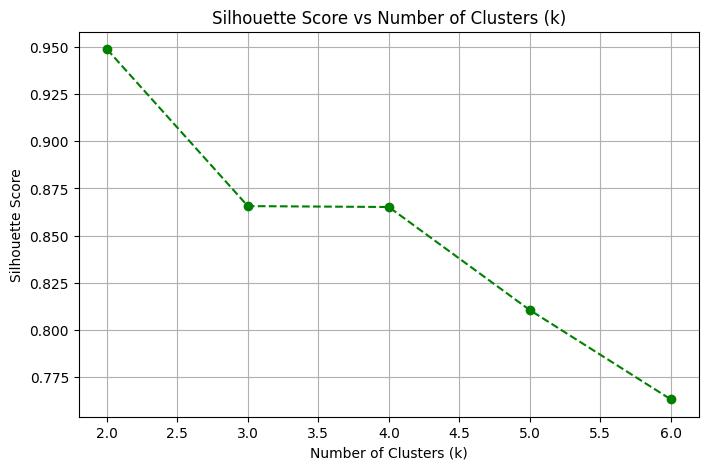

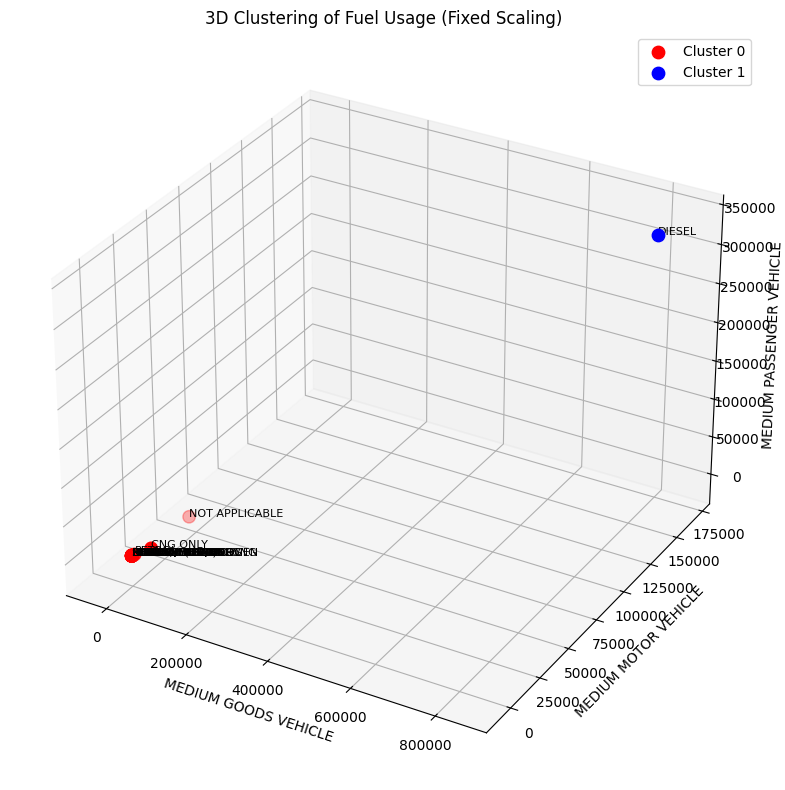


Cluster Assignments:
CNG ONLY               0
DIESEL                 1
DIESEL/HYBRID          0
DI-METHYL ETHER        0
DUAL DIESEL/BIO CNG    0
DUAL DIESEL/CNG        0
DUAL DIESEL/LNG        0
ELECTRIC(BOV)          0
ETHANOL                0
FUEL CELL HYDROGEN     0
LNG                    0
LPG ONLY               0
METHANOL               0
NOT APPLICABLE         0
PETROL                 0
PETROL/CNG             0
PETROL/ETHANOL         0
PETROL/HYBRID          0
PETROL/LPG             0
PETROL/METHANOL        0
PLUG-IN HYBRID EV      0
PURE EV                0
SOLAR                  0
STRONG HYBRID EV       0
Name: Cluster, dtype: int32


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
df = pd.read_csv("vehicle_fuel2.csv")

# Clean numeric columns: remove commas, convert to integers
for col in df.columns[1:]:
    df[col] = df[col].astype(str).str.replace(",", "").replace("nan", "0")
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Set vehicle category as index
df.set_index("Vehicle_Category", inplace=True)

# Select rows 6,7,8
selected_rows = df.iloc[6:9]  # for rows 6,7,8

# Drop "Total" column (optional)
selected_rows = selected_rows.drop(columns=["Total"], errors="ignore")

# Transpose the DataFrame (so columns become features)
fuel_data = selected_rows.T

# Sanity check: ensure all data is numeric
print(fuel_data.dtypes)

# Elbow Method to determine optimal k
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(fuel_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method for Selected Vehicle Categories")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Silhouette Scores for 2–6 clusters
print("\nSilhouette Scores:")
silhouette_scores = []
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(fuel_data)
    score = silhouette_score(fuel_data, labels)
    print(f"k = {k}: Silhouette Score = {score:.4f}")
    silhouette_scores.append(score)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 7), silhouette_scores, marker='o', linestyle='--', color='green')
plt.title("Silhouette Score vs Number of Clusters (k)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

# Final Clustering with optimal k (choose based on elbow/silhouette)
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
fuel_data['Cluster'] = kmeans.fit_predict(fuel_data)

# 3D plot with fixed scaling
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Get min/max values for each axis with padding
x_vals = fuel_data.iloc[:, 0]
y_vals = fuel_data.iloc[:, 1]
z_vals = fuel_data.iloc[:, 2]

x_range = x_vals.max() - x_vals.min()
y_range = y_vals.max() - y_vals.min()
z_range = z_vals.max() - z_vals.min()

# Set axis limits with 10% padding
ax.set_xlim(x_vals.min() - 0.1*x_range, x_vals.max() + 0.1*x_range)
ax.set_ylim(y_vals.min() - 0.1*y_range, y_vals.max() + 0.1*y_range)
ax.set_zlim(z_vals.min() - 0.1*z_range, z_vals.max() + 0.1*z_range)

# Plot the clusters
for c in range(optimal_k):
    subset = fuel_data[fuel_data['Cluster'] == c]
    ax.scatter(subset.iloc[:, 0], subset.iloc[:, 1], subset.iloc[:, 2],
               label=f"Cluster {c}", color=colors[c % len(colors)], s=80)
    # Add labels
    for label in subset.index:
        ax.text(subset.loc[label, subset.columns[0]],
                subset.loc[label, subset.columns[1]],
                subset.loc[label, subset.columns[2]], 
                label, fontsize=8)

ax.set_xlabel(fuel_data.columns[0], fontsize=10)
ax.set_ylabel(fuel_data.columns[1], fontsize=10)
ax.set_zlabel(fuel_data.columns[2], fontsize=10)
plt.title("3D Clustering of Fuel Usage (Fixed Scaling)", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Final cluster assignment
print("\nCluster Assignments:")
print(fuel_data['Cluster'])